<a href="https://colab.research.google.com/github/Liub-ov/data_analysis_2023/blob/main/Lab1_Peleshenko_FI32mn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

#for kNN
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

#for decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

#for SVM
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#for random forest
from sklearn.ensemble import RandomForestClassifier

#for AdaBoost
from sklearn.ensemble import AdaBoostClassifier

In [2]:
df = pd.read_csv('/content/sample_data/StressLevelDataset.csv') #Читаємо дані з датасету
df = df.dropna() #видаляемо сміття

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [3]:
print(df)

      anxiety_level  self_esteem  mental_health_history  depression  headache  \
0                14           20                      0          11         2   
1                15            8                      1          15         5   
2                12           18                      1          14         2   
3                16           12                      1          15         4   
4                16           28                      0           7         2   
...             ...          ...                    ...         ...       ...   
1095             11           17                      0          14         3   
1096              9           12                      0           8         0   
1097              4           26                      0           3         1   
1098             21            0                      1          19         5   
1099             18            6                      1          15         3   

      blood_pressure  sleep

In [4]:
#видаляємо стовпці
df = df.drop(['blood_pressure', 'noise_level', 'safety', 'breathing_problem', 'living_conditions', 'self_esteem', 'mental_health_history', 'basic_needs', 'depression', 'social_support', 'bullying'], axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   headache                      1100 non-null   int64
 2   sleep_quality                 1100 non-null   int64
 3   academic_performance          1100 non-null   int64
 4   study_load                    1100 non-null   int64
 5   teacher_student_relationship  1100 non-null   int64
 6   future_career_concerns        1100 non-null   int64
 7   peer_pressure                 1100 non-null   int64
 8   extracurricular_activities    1100 non-null   int64
 9   stress_level                  1100 non-null   int64
dtypes: int64(10)
memory usage: 86.1 KB
None


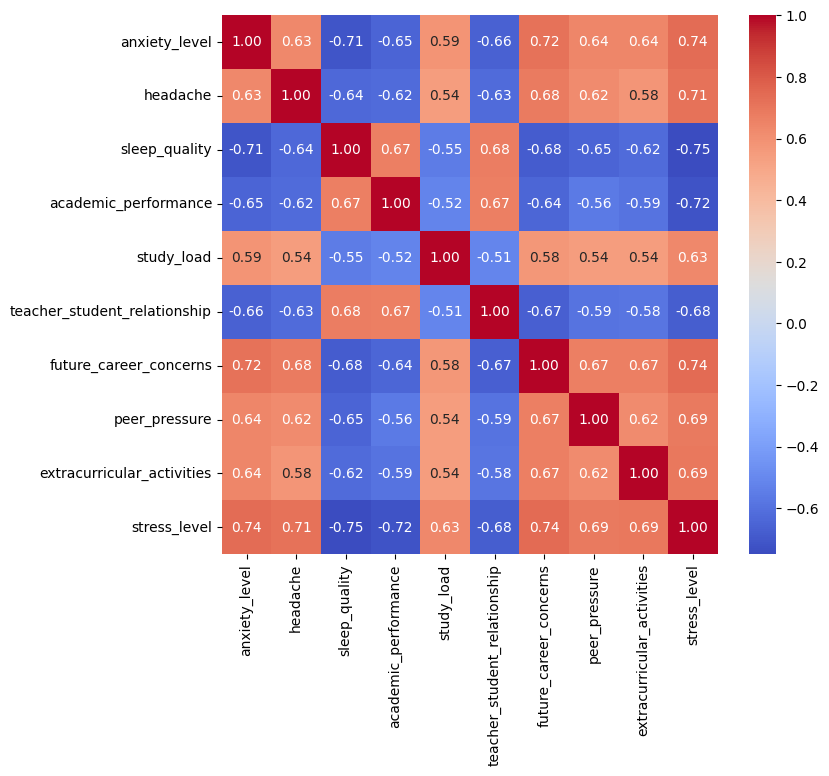

In [27]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

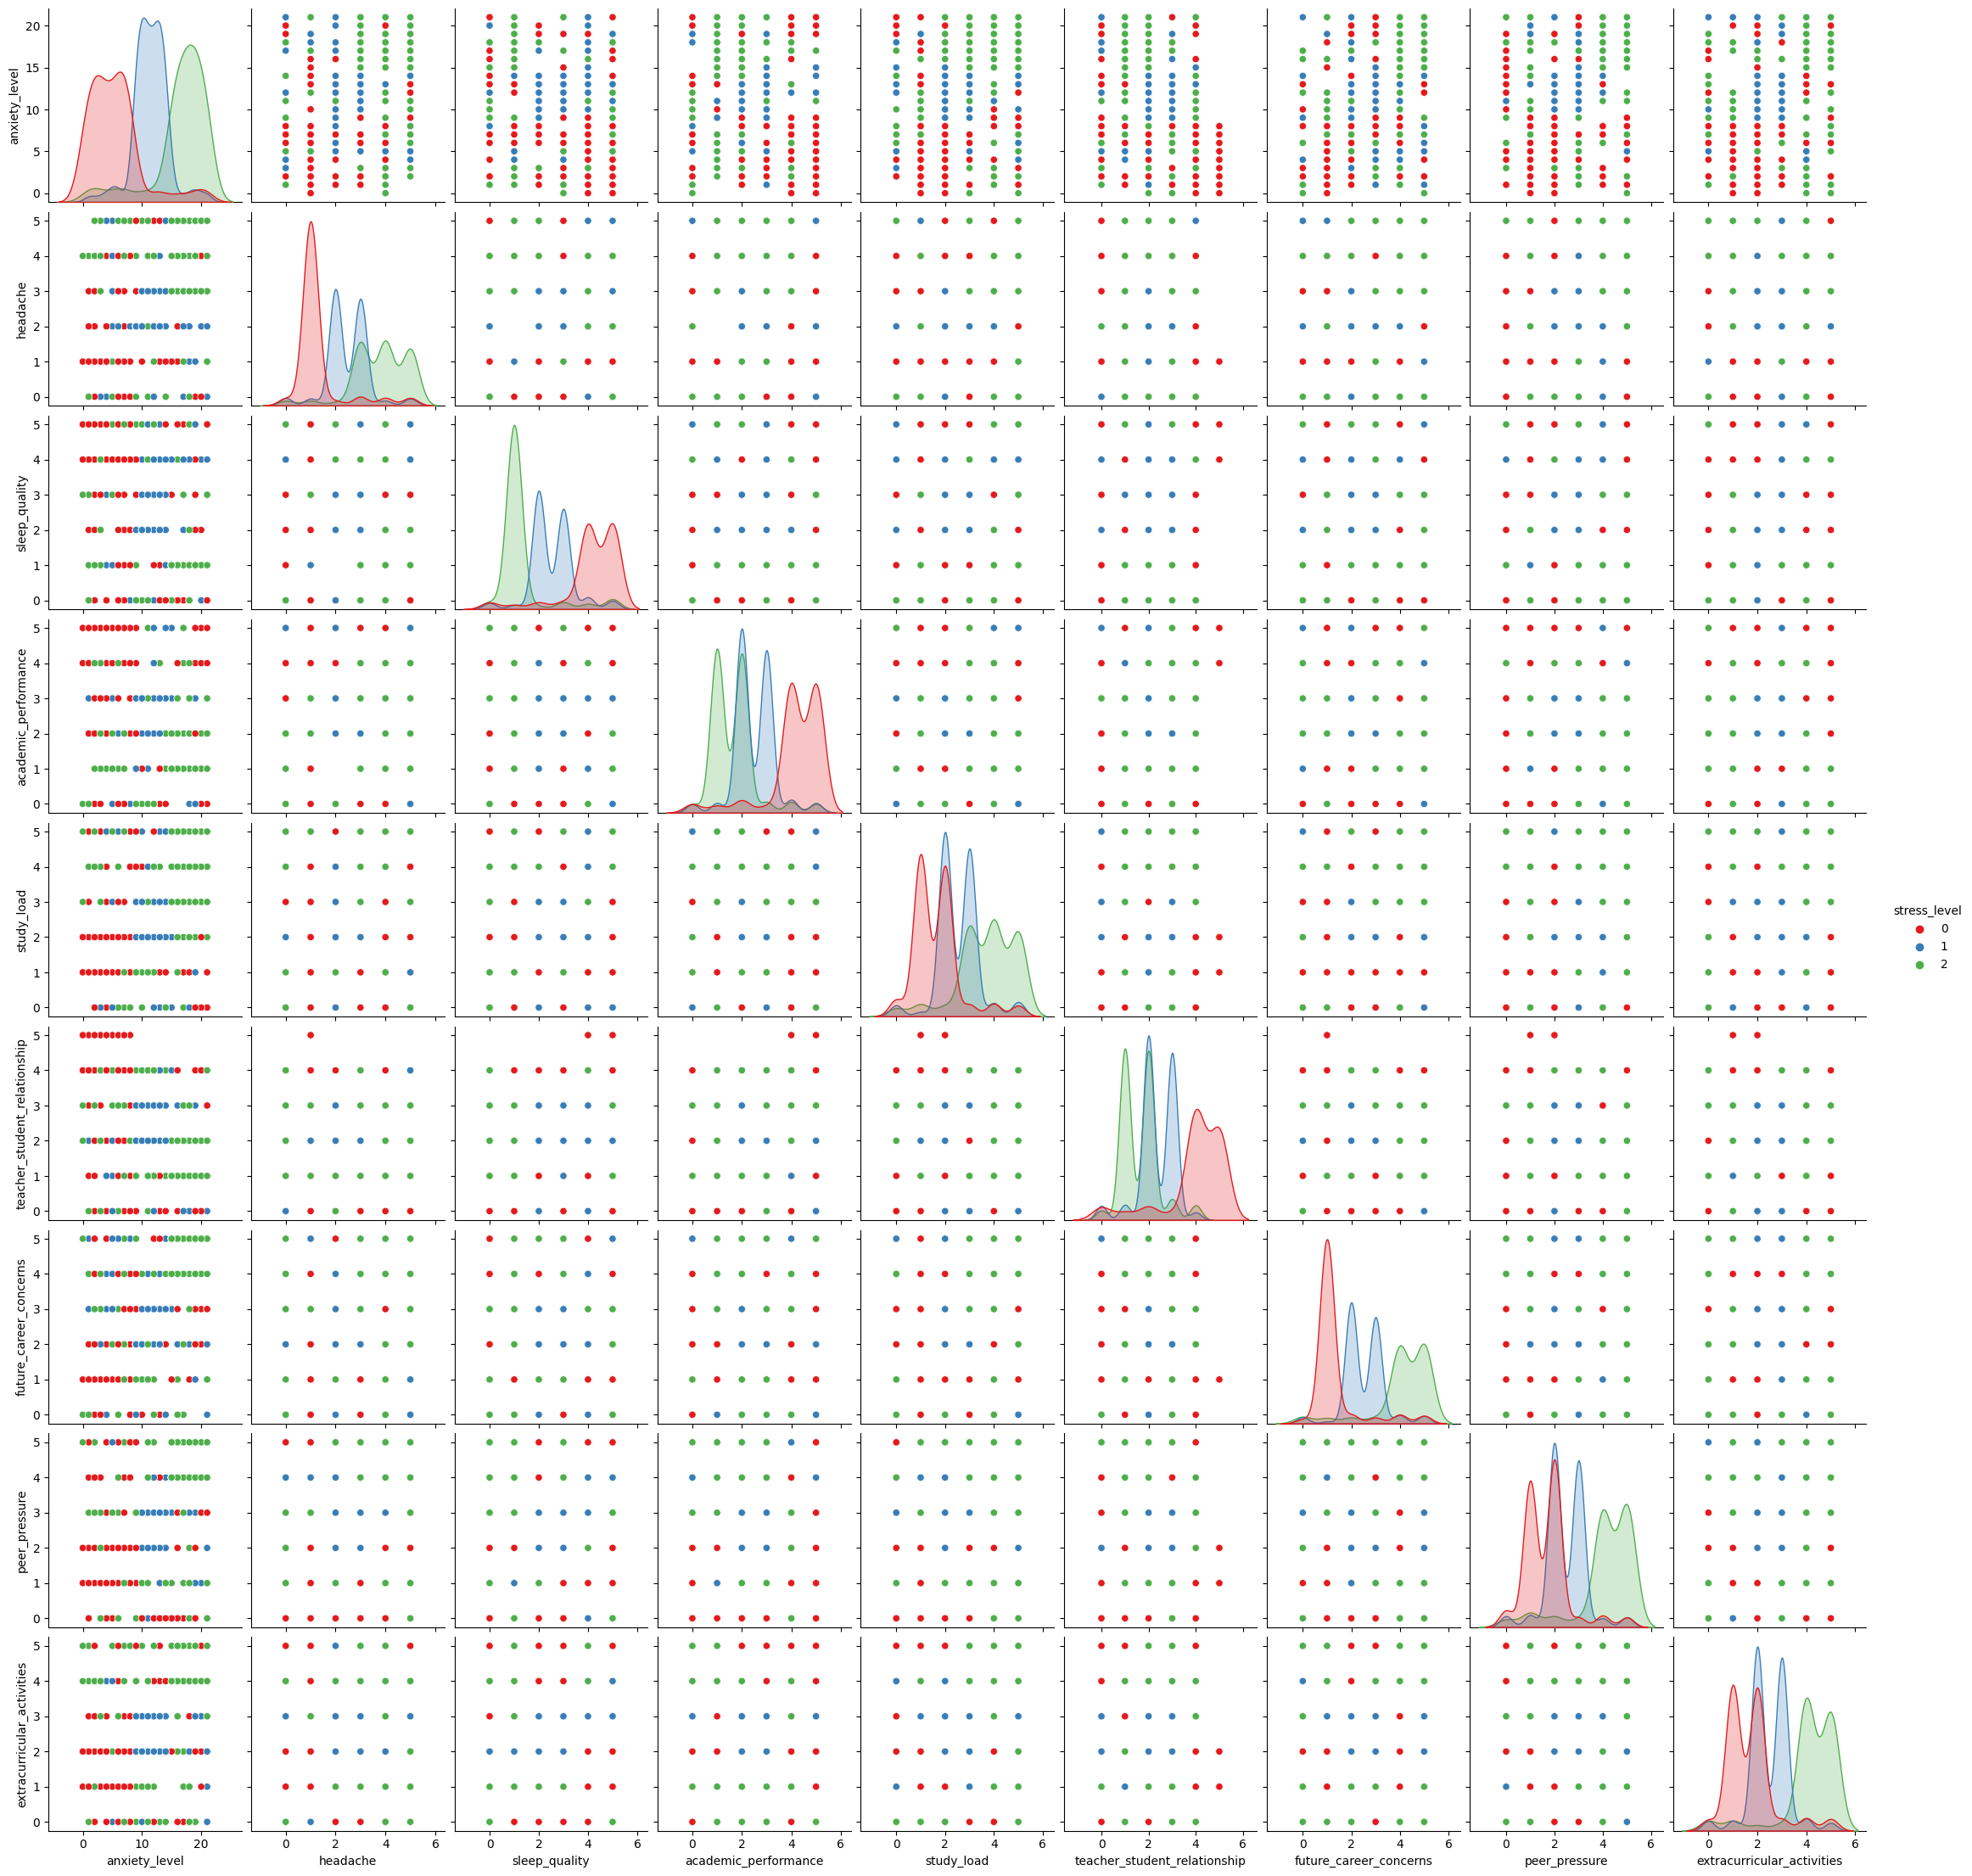

In [8]:
sns.pairplot(df, hue='stress_level', palette = 'Set1')

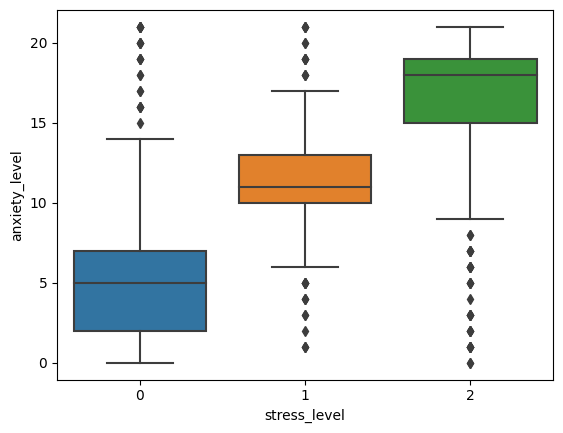

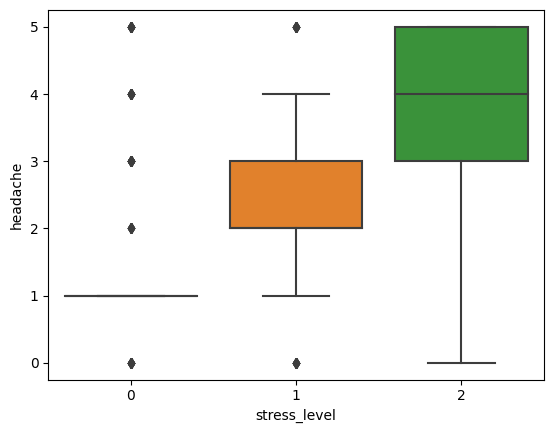

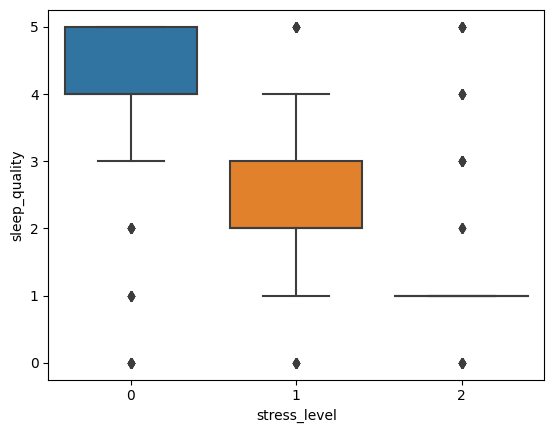

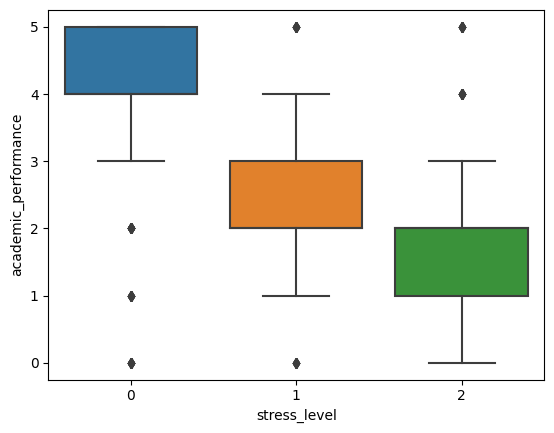

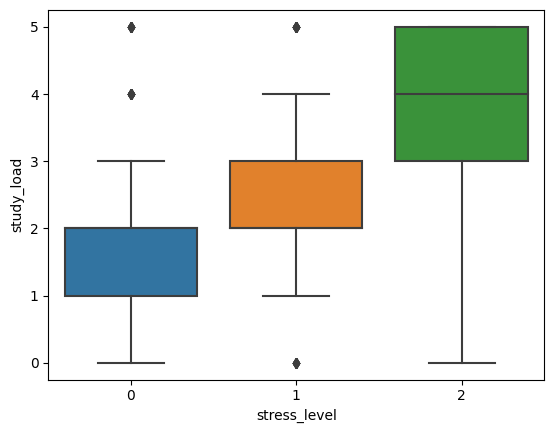

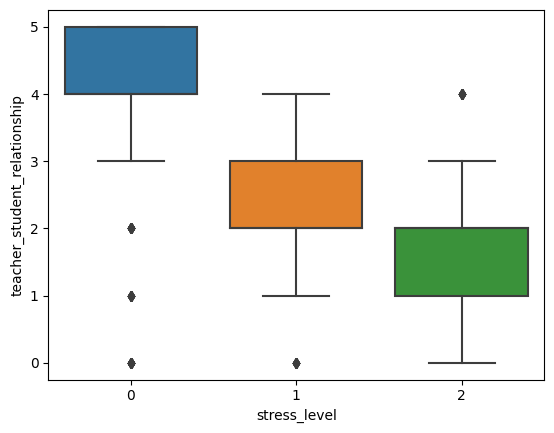

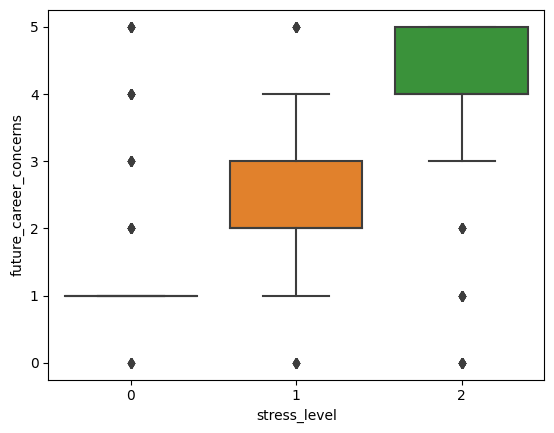

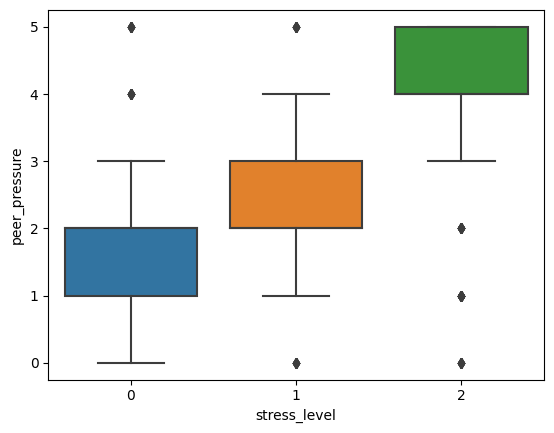

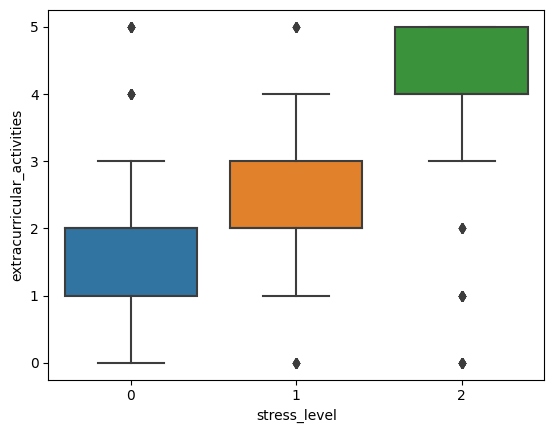

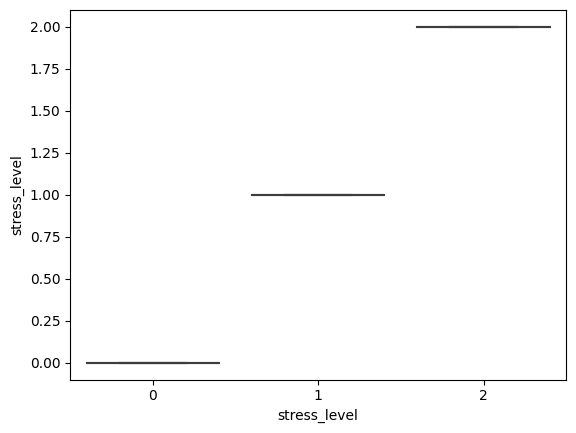

In [9]:
for i in range(len(df.keys())):
    figure = plt.figure()
    ax = sns.boxplot(x='stress_level', y=df.keys()[i], data=df)

plt.show()

In [10]:
#knn

x = df.drop(['stress_level'], axis=1)
y = df['stress_level']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(scaled_X_train, y_train)
pred = knn.predict(scaled_X_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        75
           1       0.76      0.97      0.85        70
           2       0.96      0.85      0.90        75

    accuracy                           0.89       220
   macro avg       0.90      0.89      0.89       220
weighted avg       0.91      0.89      0.89       220



In [11]:
print(confusion_matrix(y_test,pred))

[[63 11  1]
 [ 0 68  2]
 [ 0 11 64]]


In [12]:
print(accuracy_score(y_test,pred))

0.8863636363636364


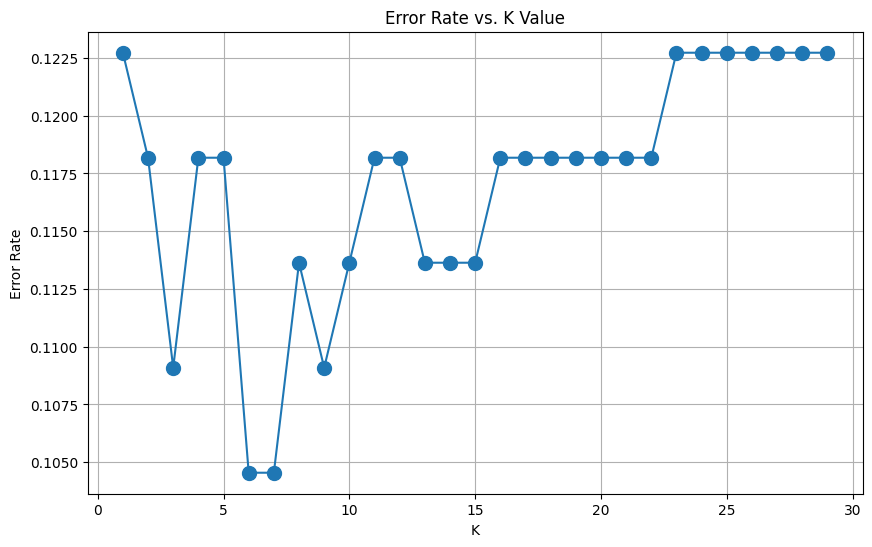

In [13]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [14]:
#дерево ухвалення рішень

X = df.drop(['stress_level'], axis = 1)
y = df['stress_level']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(type(X), type(y))
print(X_train.shape, y_train.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(880, 9) (880,)


In [16]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        76
           1       0.85      0.91      0.88        86
           2       0.82      0.81      0.82        58

    accuracy                           0.86       220
   macro avg       0.86      0.85      0.85       220
weighted avg       0.86      0.86      0.86       220



In [17]:
df.columns

Index(['anxiety_level', 'headache', 'sleep_quality', 'academic_performance',
       'study_load', 'teacher_student_relationship', 'future_career_concerns',
       'peer_pressure', 'extracurricular_activities', 'stress_level'],
      dtype='object')

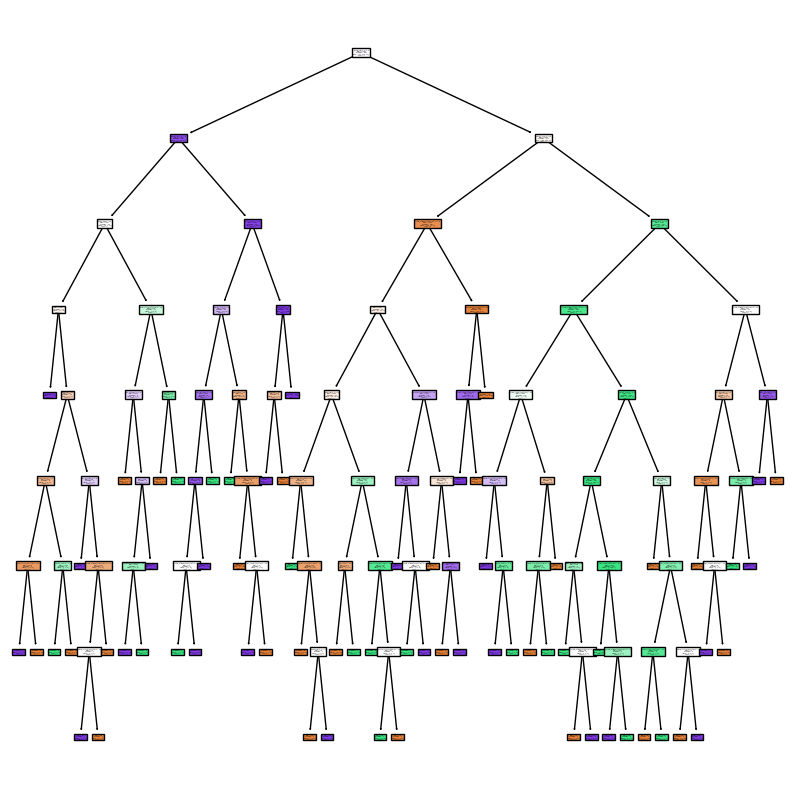

In [18]:
plt.figure(figsize = (10, 10))
plot_tree(model, feature_names = ['anxiety_level', 'headache', 'sleep_quality', 'academic_performance',
       'study_load', 'teacher_student_relationship', 'future_career_concerns',
       'peer_pressure', 'extracurricular_activities'],
          class_names = ['0', '1', '2'], filled = True)
plt.show()

In [32]:
#SVM

X_train, X_test, y_train, y_test = train_test_split(df, df['stress_level'], test_size=0.30, random_state=101)

scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

model = SVC(C=1.0, gamma = 1.0, kernel = 'rbf')
model.fit(scaled_X_train,y_train)
y_pred = model.predict(scaled_X_test)
print(confusion_matrix(y_test, y_pred))

[[ 87   0  26]
 [  0  91  18]
 [  0   0 108]]


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87       113
           1       1.00      0.83      0.91       109
           2       0.71      1.00      0.83       108

    accuracy                           0.87       330
   macro avg       0.90      0.87      0.87       330
weighted avg       0.91      0.87      0.87       330



In [34]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [35]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [36]:
grid.best_estimator_

SVC(C=10, gamma=0.01)

In [37]:
grid_predictions = grid.predict(scaled_X_test)
print(classification_report(y_test,grid_predictions))
print()
print(confusion_matrix(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       109
           2       1.00      1.00      1.00       108

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330


[[113   0   0]
 [  0 109   0]
 [  0   0 108]]


In [38]:
#Random Forest

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        76
           1       0.90      0.80      0.85        75
           2       0.84      0.90      0.87        69

    accuracy                           0.86       220
   macro avg       0.86      0.86      0.86       220
weighted avg       0.86      0.86      0.86       220



In [39]:
print(confusion_matrix(y_test, y_pred))

[[67  5  4]
 [ 7 60  8]
 [ 5  2 62]]


In [40]:
#AdaBoost

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=1)
adaboost_classifier.fit(X_train, y_train)

y_pred = adaboost_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        85
           1       0.87      0.89      0.88        65
           2       0.87      0.93      0.90        70

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220



In [41]:
print(confusion_matrix(y_test, y_pred))

[[72  6  7]
 [ 4 58  3]
 [ 2  3 65]]
